Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------         

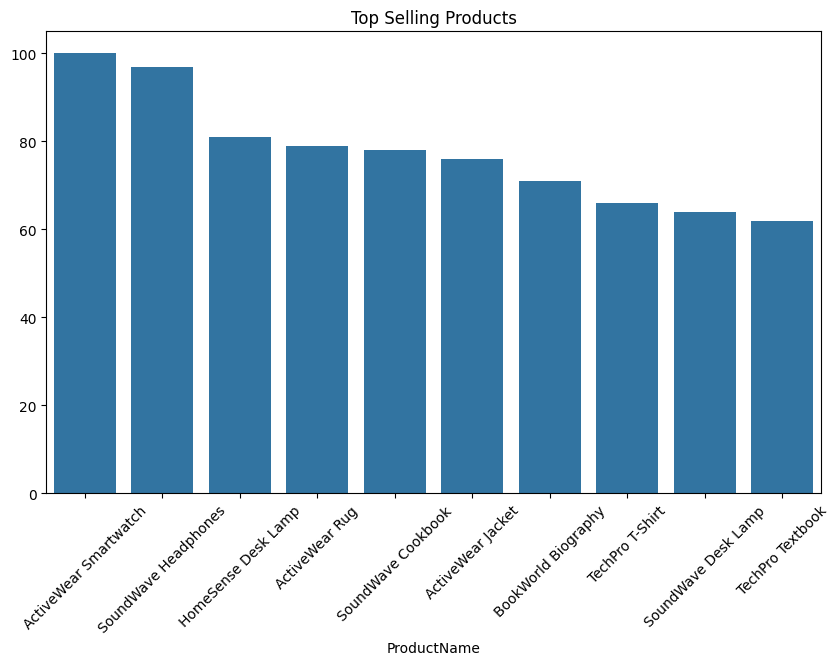

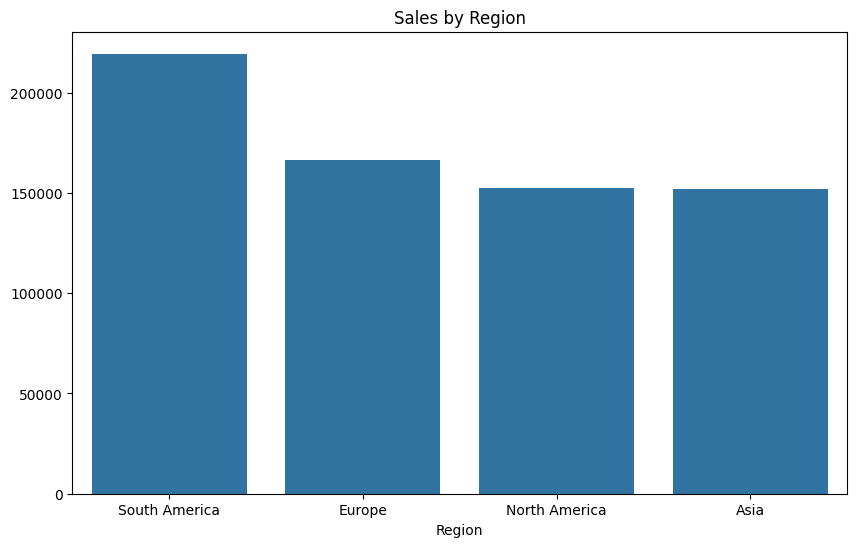

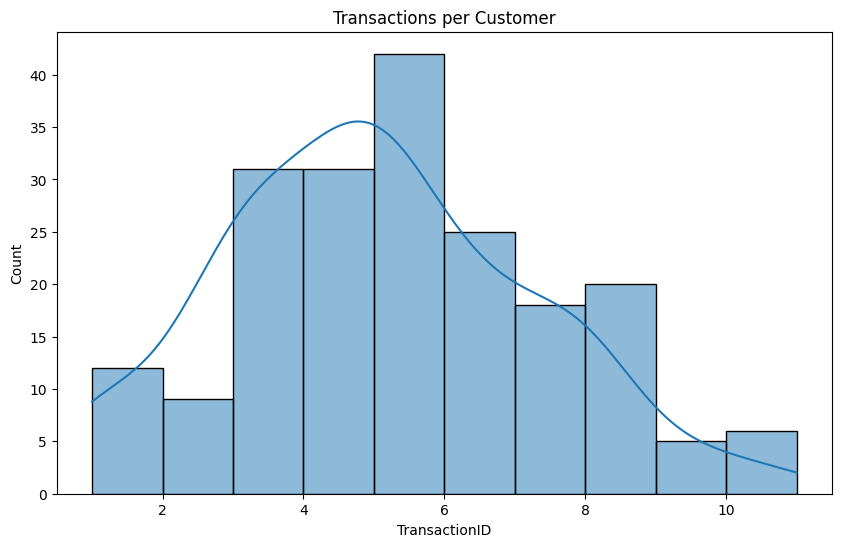

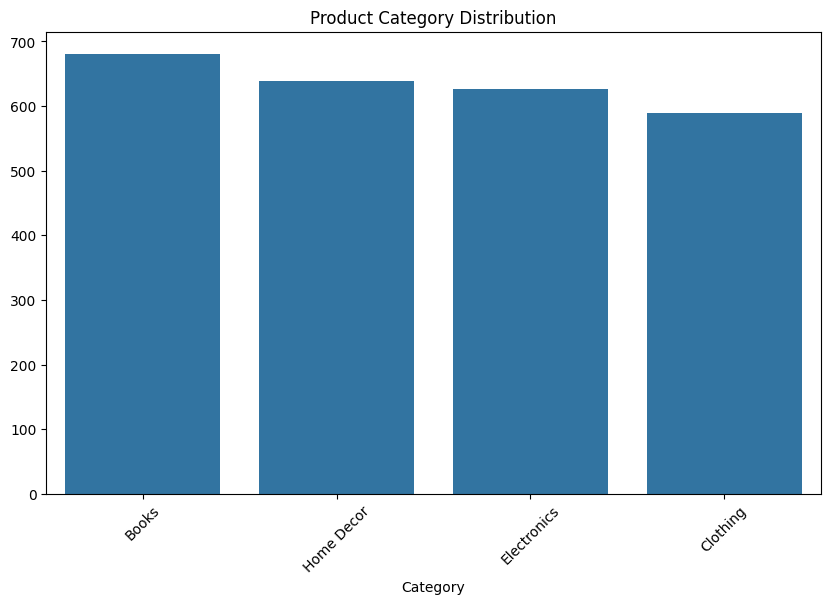

In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')

customers_df = pd.read_csv('/content/Customers.csv')
products_df = pd.read_csv('/content/Products.csv')
transactions_df = pd.read_csv('/content/Transactions.csv')

customers_df.info()
products_df.info()
transactions_df.info()

customers_df.describe()
products_df.describe()
transactions_df.describe()

merged_df = transactions_df.merge(customers_df, on='CustomerID').merge(products_df, on='ProductID')

top_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)

sales_by_region = merged_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

transactions_per_customer = merged_df.groupby('CustomerID')['TransactionID'].count()

category_distribution = merged_df.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top Selling Products')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values)
plt.title('Sales by Region')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(transactions_per_customer, kde=True)
plt.title('Transactions per Customer')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_distribution.index, y=category_distribution.values)
plt.title('Product Category Distribution')
plt.xticks(rotation=45)
plt.show()
